# File and libraries

In [64]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_2024_agg_time_diff_input.csv'


file_tag = "Google Merch Store 2024-2025"


# DSLabs functions

In [65]:
%run "scripts/dslabs_functions.py"


# Data functions

In [66]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [67]:
# test_data=True
test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
target='Sessions'
series: Series = data[target]

test_split_threshold = 0.8

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 426 entries, 2024-01-05 to 2025-03-05
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         426 non-null    float64
 1   Seven-day active users           426 non-null    float64
 2   28-day active users              426 non-null    float64
 3   Events per session               426 non-null    float64
 4   Add to baskets                   426 non-null    float64
 5   Average purchase revenue         426 non-null    float64
 6   Purchase revenue                 426 non-null    float64
 7   Average session duration         426 non-null    float64
 8   ARPU                             426 non-null    float64
 9   ARPPU                            426 non-null    float64
 10  Views per user                   426 non-null    float64
 11  Total users                      426 non-null    float64
 12  Pro

# No Smoothing

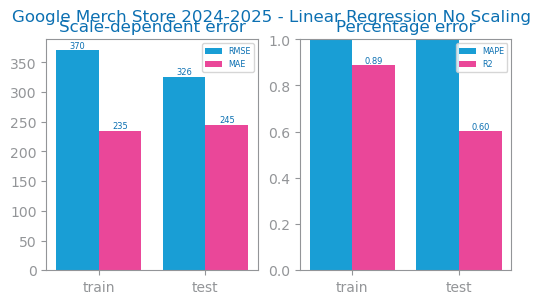

In [68]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)

# Prepare the training and testing data
trnX_0 = train_0.drop(columns=[target])
trnY_0 = train_0[target]
tstX_0 = test_0.drop(columns=[target])
tstY_0 = test_0[target]

# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Scaling")
savefig(f"images/{file_tag}_linear_regression_eval_no_smoothing.png")

## no smoothing plot

<Axes: xlabel='Date', ylabel='Sessions'>

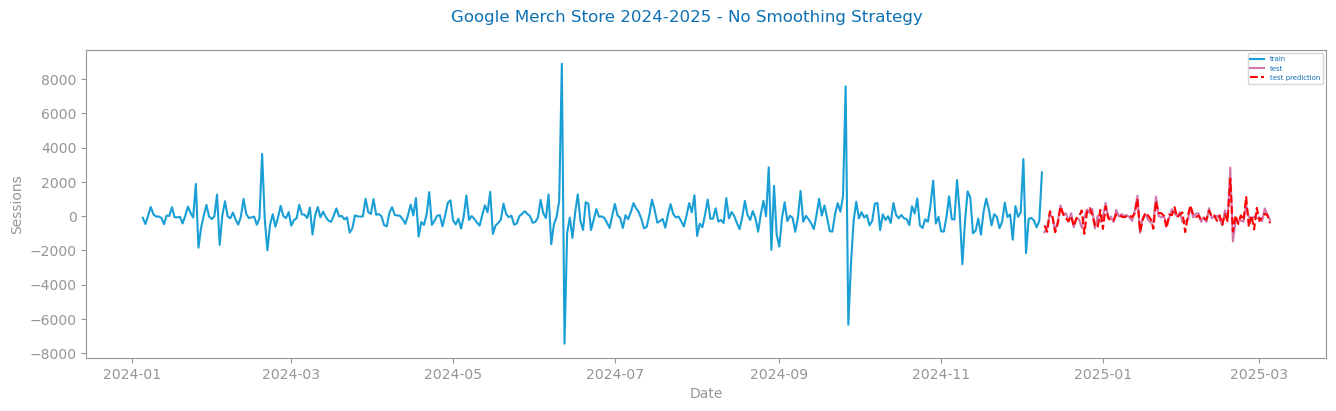

In [69]:
plot_forecasting_series(
    train_0[target],
    test_0[target],
    prd_tst_0,
    title=f"{file_tag} - No Smoothing Strategy",
    xlabel='Date',
    ylabel=target,
)

# Smoothing

## Smoothing strategy Application

In [70]:

def apply_strategy_1(df):

    data_copy=df.copy()
    

    # Split the data into train and test sets
    train, test = series_train_test_split(data_copy, trn_pct=test_split_threshold)
    

    WIN_SIZE = 10
    
    #smoothing over the training data
    train_smoothed=train.rolling(window=WIN_SIZE).mean().dropna()

    return train_smoothed, test



train_1,test_1=apply_strategy_1(data)

print(train_1.info())

print(test_1.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 331 entries, 2024-01-14 to 2024-12-09
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         331 non-null    float64
 1   Seven-day active users           331 non-null    float64
 2   28-day active users              331 non-null    float64
 3   Events per session               331 non-null    float64
 4   Add to baskets                   331 non-null    float64
 5   Average purchase revenue         331 non-null    float64
 6   Purchase revenue                 331 non-null    float64
 7   Average session duration         331 non-null    float64
 8   ARPU                             331 non-null    float64
 9   ARPPU                            331 non-null    float64
 10  Views per user                   331 non-null    float64
 11  Total users                      331 non-null    float64
 12  Pro

## No Smoothing evaluate

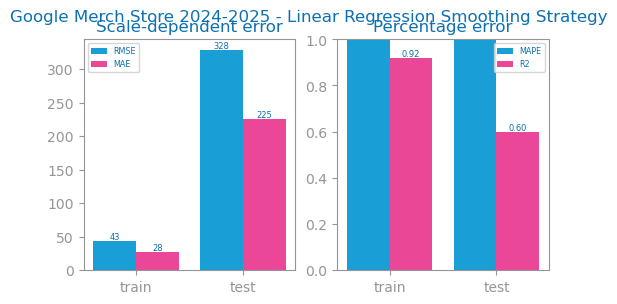

In [71]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets ------------------> ALREADY SPLIT IN THE STRATEGY FUNCTION
# train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Prepare the training and testing data
trnX_1 = train_1.drop(columns=[target])
trnY_1 = train_1[target]
tstX_1 = test_1.drop(columns=[target])
tstY_1 = test_1[target]

# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression Smoothing Strategy")
savefig(f"images/{file_tag}_linear_regression_eval_smoothing.png")

## Smoothing Plot

<Axes: xlabel='Date', ylabel='Sessions'>

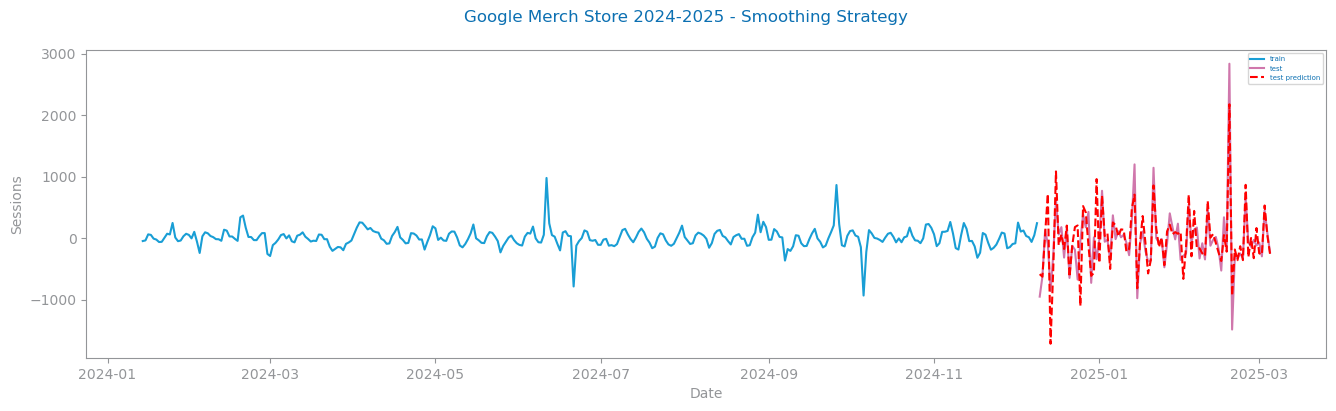

In [72]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - Smoothing Strategy",
    xlabel='Date',
    ylabel=target,
)

# Approach uplift comparison

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["No Smoothing", "Smoothing"],
    "MAE": [
        mean_absolute_error(test_0[target], prd_tst_0),
        mean_absolute_error(test_1[target], prd_tst_1),
    ],
    "MSE": [
        mean_squared_error(test_0[target], prd_tst_0),
        mean_squared_error(test_1[target], prd_tst_1),
    ],
    "RMSE": [
        mean_squared_error(test_0[target], prd_tst_0, squared=False),
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
    ],
    "R²": [
        r2_score(test_0[target], prd_tst_0),
        r2_score(test_1[target], prd_tst_1),
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0[target], prd_tst_0),
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

          Model         MAE            MSE        RMSE        R²          MAPE
0  No Smoothing  245.099452  106356.650484  326.123674  0.603580  2.016047e+12
1     Smoothing  224.935242  107606.159546  328.033778  0.598923  1.867658e+12


# save to csv

In [75]:
if test_data==False:
    

    data_save=data.copy()

    # if no smoothing was applied, the train and test data are the same
    # train_save, test_save = series_train_test_split(data_save, trn_pct=test_split_threshold)


    # apply smoothing strategy
    train_save,test_save=apply_strategy_1(data)

    train_save.reset_index(inplace=True)
    train_save.to_csv(f"data/df_merch_0_2024_agg_time_final_train.csv", index=False)
    
    
    test_save.reset_index(inplace=True)
    test_save.to_csv(f"data/df_merch_0_2024_agg_time_final_test.csv", index=False)
          

    print(train_save.columns)
    print(test_save.columns)

Index(['Date', 'Sessions', 'Seven-day active users', '28-day active users',
       'Events per session', 'Add to baskets', 'Average purchase revenue',
       'Purchase revenue', 'Average session duration', 'ARPU', 'ARPPU',
       'Views per user', 'Total users', 'Promotion clicks', 'Sessions Mobile',
       'Seven-day active users Mobile', '28-day active users Mobile',
       'New users Mobile', 'Scrolled users Mobile', 'Engaged sessions Mobile',
       'Views Mobile', 'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration Mobile', 'Sessions (not set)',
       'Sessions affiliate', 'Sessions cpc', 'Sessions cpm', 'Sessions email',
       'Sessions other', 'Sessions referral', 'season', 'commercial_season'